# 데이터셋

## 허깅페이스 데이터셋 처음 사용하기

In [1]:
from datasets import list_datasets

In [2]:
all_datasets = list_datasets()

/tmp/ipykernel_2760/374882858.py:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  all_datasets = list_datasets()


In [3]:
print(f'현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다')
print(f'처음 10개의 데이터셋: {all_datasets[:10]} : ')

현재 허브에는 103215개의 데이터셋이 있습니다
처음 10개의 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'UCLNLP/adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'allenai/ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews'] : 


In [4]:
from datasets import load_dataset
emotions = load_dataset('emotion')

/home/restful3/anaconda3/envs/trading/lib/python3.9/site-packages/datasets/load.py:1429: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [5]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds = emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [7]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [8]:
train_ds.column_names

['text', 'label']

In [9]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [10]:
train_ds[:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [11]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1"
!wget {dataset_url}

--2024-02-02 13:22:32--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.84.18, 2620:100:6034:18::a27d:5412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.84.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/1pzkadrvffbqw6o/train.txt [following]
--2024-02-02 13:22:32--  https://www.dropbox.com/s/dl/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2024-02-02 13:22:32 ERROR 404: Not Found.



## 데이터셋에서 데이터프레임으로

In [12]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [13]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [14]:
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [15]:
emotions["train"].features["label"]

ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

## 클래스 분포 살펴보기

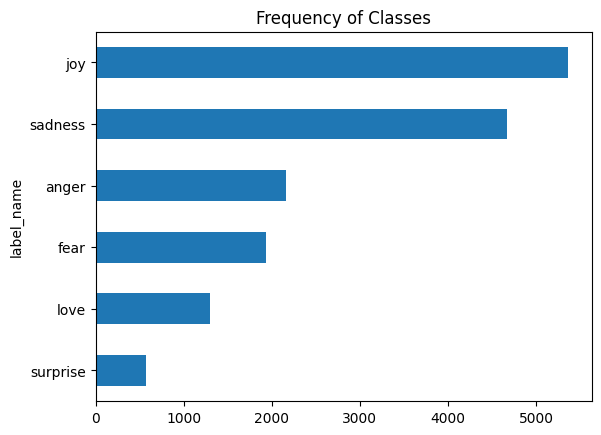

In [16]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

## 트윗 길이 확인

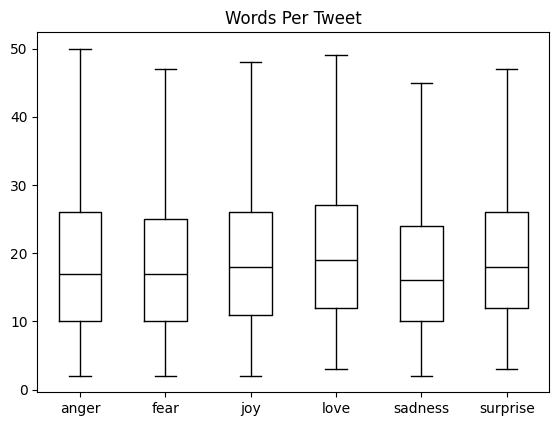

In [17]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [18]:
emotions.reset_format()

# 텍스트에서 토큰으로

## 문자 토큰화

In [19]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [20]:
token2idx = {ch:idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [21]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [22]:
categorical_df = pd.DataFrame(
    {'Name':["Bumblebee", "Optimus Price", "Megtron"], "Label ID":[0, 1, 2]}
)
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Price,1
2,Megtron,2


In [23]:
categorical_df["Name"]

0        Bumblebee
1    Optimus Price
2          Megtron
Name: Name, dtype: object

In [24]:
pd.get_dummies(categorical_df['Label ID'])

,0,1,2
0,True,False,False
1,False,True,False
2,False,False,True


In [25]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megtron,Optimus Price
0,True,False,False
1,False,False,True
2,False,True,False


In [26]:
len(text), len(token2idx)

(38, 20)

In [27]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [28]:
one_hot_encodings

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0,

In [29]:
print(f"토큰: {tokenized_text[0]}")
print(f"텐서 인덱스: {input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰: T
텐서 인덱스: 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


## 단어 토큰화

In [30]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


## 부분단어 토큰화

In [31]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [32]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [33]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [34]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [35]:
text

'Tokenizing text is a core task of NLP.'

In [36]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [37]:
tokenizer.vocab_size

30522

In [38]:
tokenizer.model_max_length

512

In [39]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

## 전체 데이터셋 토큰화하기

In [40]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [41]:
emotions["train"][:2]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'],
 'label': [0, 0]}

In [42]:
tokenize(emotions["train"][:2])

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [43]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

In [44]:
emotions_encoded['train'].column_names

['text', 'label', 'input_ids', 'attention_mask']

# 텍스트 분류 모델 훈련하기

## 트랜스포머를 특성 추출기로 사용하기

**사전 훈련된 모델 사용하기**

In [45]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

**마지막 은닉 상태 추출하기**

In [46]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [47]:
text = "this is a test"
inputs = tokenizer(text, return_tensors='pt')
print(f"입력 텐서 크기 : {inputs['input_ids'].size()}")

입력 텐서 크기 : torch.Size([1, 6])


In [48]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [49]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [50]:
outputs.last_hidden_state[:, 0].size()

torch.Size([1, 768])

In [51]:
def extract_hidden_stats(batch):
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {"hidden_state":last_hidden_state[:, 0].cpu().numpy()}

In [52]:
emotions_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

In [53]:
emotion_hidden = emotions_encoded.map(extract_hidden_stats, batched=True)

In [54]:
emotion_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

**특성 행렬 만들기**

In [55]:
import numpy as np

X_train = np.array(emotion_hidden['train']['hidden_state'])
X_valid = np.array(emotion_hidden['validation']['hidden_state'])
y_train = np.array(emotion_hidden['train']['label'])
y_valid = np.array(emotion_hidden['validation']['label'])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

**훈련 세트 시각화하기**

In [56]:
# !pip3 install umap-learn

In [57]:
# 소스 : https://stackoverflow.com/questions/68747605/importerror-cannot-import-name-umap-from-umap-c-users-user-anaconda3-lib
# 소스2 : https://github.com/MaartenGr/BERTopic/issues/723
from umap import umap_ as UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP.UMAP(n_components=2, metric="cosine").fit(X_scaled)

In [58]:
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.259660,6.498600,0
1,-2.975846,5.828531,0
2,5.204065,3.017635,3
3,-2.279257,3.508682,2
4,-3.275663,3.863336,3


In [59]:
df_emb['label'].value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

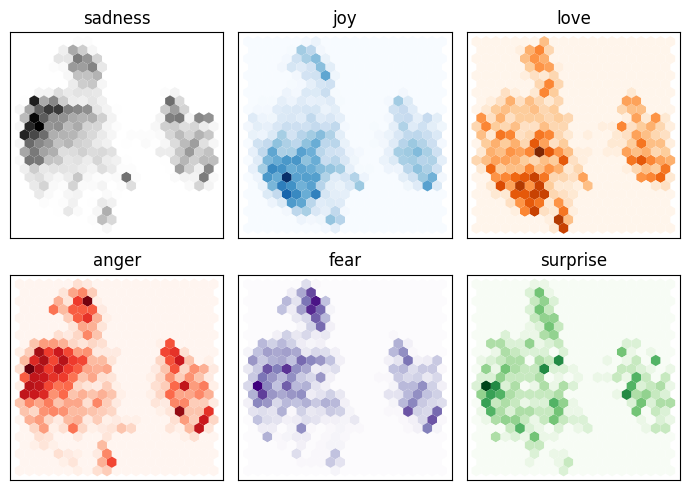

In [60]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f'label == {i}')
    axes[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

**간단한 분류 모델 훈련하기**

In [61]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

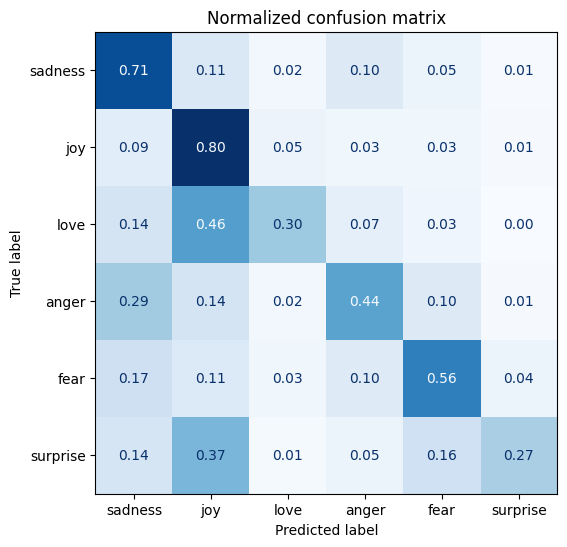

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_valid)    
plot_confusion_matrix(y_preds, y_valid, labels)

## 트랜스포머 미세 튜징하기

**사전 훈련된 모델 로드하기**

In [63]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model_ckpt = "distilbert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**성공 지표 정의하기**

In [64]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}

**모델 훈련하기**

In [65]:
from huggingface_hub import notebook_login

notebook_login()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [76]:
from transformers import Trainer, TrainingArguments

In [77]:
batch_size = 64
logging_steps = len(emotions_encoded['train']) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"

In [78]:
training_args = TrainingArguments(output_dir=model_name,
                                 num_train_epochs=2,
                                 learning_rate=2e-5,
                                 per_device_train_batch_size=batch_size,
                                 per_device_eval_batch_size=batch_size,
                                 weight_decay=0.01,
                                 disable_tqdm=False,
                                 logging_steps=logging_steps,
                                 push_to_hub=True,
                                 save_strategy='epoch',
                                 load_best_model_at_end=True,
                                 log_level='error',
                                 evaluation_strategy='epoch')

In [79]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                 compute_metrics=compute_metrics,
                 train_dataset=emotions_encoded['train'],
                 eval_dataset=emotions_encoded['validation'],
                 tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.164100,0.167232,0.931000,0.931107
2,0.109300,0.150823,0.934500,0.934653


TrainOutput(global_step=500, training_loss=0.13671983718872072, metrics={'train_runtime': 133.4862, 'train_samples_per_second': 239.725, 'train_steps_per_second': 3.746, 'total_flos': 720342861696000.0, 'train_loss': 0.13671983718872072, 'epoch': 2.0})

In [80]:
preds_output = trainer.predict(emotions_encoded['validation'])
preds_output.metrics

{'test_loss': 0.15082259476184845,
 'test_accuracy': 0.9345,
 'test_f1': 0.9346529848491013,
 'test_runtime': 2.0943,
 'test_samples_per_second': 954.975,
 'test_steps_per_second': 15.28}

In [81]:
y_preds = np.argmax(preds_output.predictions, axis=1)

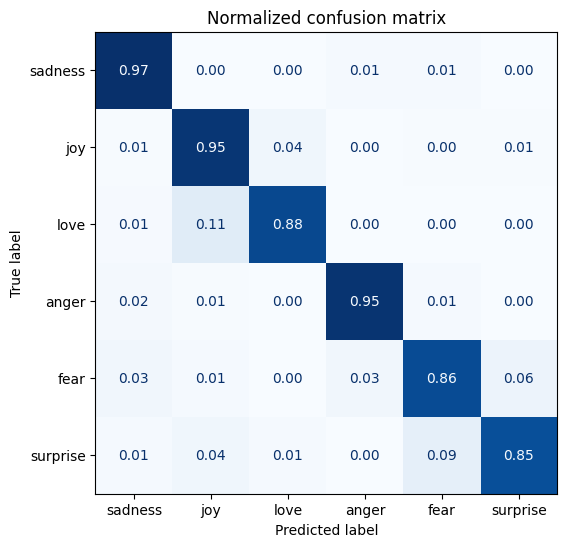

In [83]:
labels = emotions['train'].features['label'].names
plot_confusion_matrix(y_preds, y_valid, labels)

**오류 분석**

In [89]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=1)
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction="none")
    return {"loss":loss.cpu().numpy(), 'predicted_label': pred_label.cpu().numpy()}

In [90]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])
emotions_encoded['validation'] = emotions_encoded['validation'].map(forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [100]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = (df_test['predicted_label'].apply(label_int2str))
df_test.head()

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.003089
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.003396
2,i feel like a faithful servant,love,love,0.497849
3,i am just feeling cranky and blue,anger,anger,0.004291
4,i can have for a treat or if i am feeling festive,joy,joy,0.002152


**데이터셋의 특이사항**

In [101]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
405,i have been feeling extraordinarily indecisive...,fear,joy,7.509981
1870,i guess i feel betrayed because i admired him ...,joy,sadness,6.478497
1111,im lazy my characters fall into categories of ...,joy,fear,6.351411
1950,i as representative of everything thats wrong ...,surprise,sadness,6.343956
1963,i called myself pro life and voted for perry w...,joy,sadness,6.259431
318,i felt ashamed of these feelings and was scare...,fear,sadness,5.443327
1757,i feel like there s a reason to buy another to...,anger,joy,5.073571
1840,id let you kill it now but as a matter of fact...,joy,fear,5.016335
1836,i got a very nasty electrical shock when i was...,fear,anger,4.389585
882,i feel badly about reneging on my commitment t...,love,sadness,4.323443


In [102]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.001953
1020,i feel that the content i have in mind isnt re...,joy,joy,0.002031
1544,i feel that my charlie card is much more valua...,joy,joy,0.002038
702,i only find out that they are looking and feel...,joy,joy,0.002049
669,i am not feeling very joyful today its been a ...,joy,joy,0.002089
212,i own the brushes are constantly used and i fe...,joy,joy,0.002094
173,i expected to feel more but nope i dont and th...,joy,joy,0.002103
1780,ive explained that he is very creative and lov...,joy,joy,0.002107
632,i feel he is an terrific really worth bet,joy,joy,0.002112
845,i already feel very glamorous have a great day...,joy,joy,0.002114


**모델 저장 및 공유**
- https://huggingface.co/restful3/distilbert-base-uncased-finetuned-emotion

In [103]:
trainer.push_to_hub(commit_message='Training completed!')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/restful3/distilbert-base-uncased-finetuned-emotion/commit/51a7603e506c6654e3898fafbe384b8c37fff404', commit_message='Training completed!', commit_description='', oid='51a7603e506c6654e3898fafbe384b8c37fff404', pr_url=None, pr_revision=None, pr_num=None)

In [104]:
from transformers import pipeline

model_id = "restful3/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model = model_id)

config.json:   0%|          | 0.00/883 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [105]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/home/restful3/anaconda3/envs/trading/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


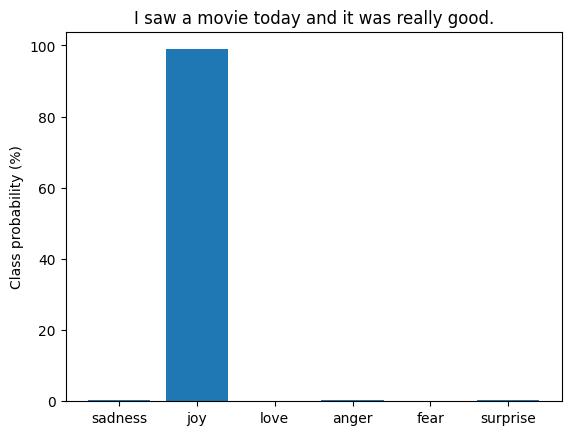

In [106]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100*preds_df['score'], color='C0')
plt.title(f"{custom_tweet}")
plt.ylabel("Class probability (%)")
plt.show()